In [1]:
# requires installing nbformat

%run init.ipynb

2019-11-17 16:40:32,593 - root - INFO - Maximum size for inputs and outputs is: 42

2019-11-17 16:40:34,525 - root - INFO - Size of input vocabulary=56
2019-11-17 16:40:34,526 - root - INFO - Size of output vocabulary=1232
2019-11-17 16:40:34,526 - root - INFO - Seq2SeqDataBunch;

Train: LabelList (40689 items)
x: Seq2SeqTextList
xxbos xxmaj the xxup xxx , pub , customer rating 5 out of 5 , price range more than £ 30 , near xxup yyy,xxbos xxmaj the xxup xxx , pub , xxmaj english , price range cheap , near xxup yyy,xxbos xxmaj the xxup xxx , coffee shop , xxmaj japanese , customer rating low , price range less than £ 20 , family friendly yes , area riverside , near xxup yyy,xxbos xxmaj the xxup xxx , coffee shop , xxmaj french , price range £ 20 - 25 , area riverside , near the xxup yyy,xxbos xxup xxx , xxmaj french , customer rating high , area riverside , near the xxup yyy
y: TextList
xxbos xxmaj the xxup xxx pub near xxup yyy has a 5 star rating . xxmaj prices start at £ 30 .,xxbos x

xxunk
xxpad
xxbos
xxeos
xxfld
xxmaj
xxup
xxrep
xxwrep
xxunk
xxpad
xxbos
xxeos
xxfld
xxmaj
xxup
xxrep
xxwrep
n't
xxxs
clentele
d'oeuvres
-stars
d'oeuvre
-priced
yyyn
caféteria
2019-11-17 16:42:17,775 - root - INFO - Encoder embeddings saved to: ./enc_emb.pth
2019-11-17 16:42:17,778 - root - INFO - Encoder embeddings saved to: ./dec_emb.pth


/Users/nadjet/Work/seq2seq/seq2seq_venv/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Embedding. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [2]:
from seq2seq.seq2seq_tf import Seq2SeqRNN_tf
from fastai.text import Learner, partial
from utils.loss import Loss
from utils.bleu import CorpusBLEU
from utils.teacher_forcing import TeacherForcing
from utils.metrics import Metrics
from utils.predict import *
import random

In [3]:
dl.max_size

42

In [4]:
HIDDEN_LAYER_SIZE = 64
MAX_SIZE = dl.max_size
emb_enc = embs.emb_enc
emb_dec = embs.emb_dec
data = dl.data
seq2seq_loss = Loss.seq2seq_loss
seq2seq_acc = Metrics.seq2seq_acc

In [5]:
rnn_tf = Seq2SeqRNN_tf(emb_enc, emb_dec, HIDDEN_LAYER_SIZE, MAX_SIZE)

learn = Learner(data, rnn_tf, loss_func=seq2seq_loss, metrics=[seq2seq_acc, CorpusBLEU(len(data.y.vocab.itos))],
               callback_fns=partial(TeacherForcing, end_epoch=10))

## Training model

In [ ]:
learn.lr_find()

Min numerical gradient: 4.71E-03
Min loss divided by 10: 7.79E-04


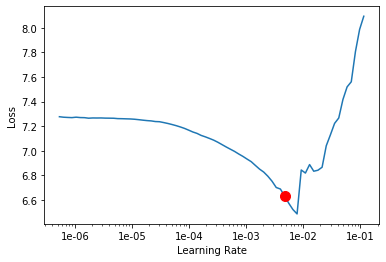

In [7]:
learn.recorder.plot(suggestion=True,skip_end=10)

In [8]:
learn.fit_one_cycle(3, 7.79E-03)

epoch,train_loss,valid_loss,seq2seq_acc,bleu,time
0,1.000198,6.567329,0.238728,0.322356,06:32
1,0.948405,5.969526,0.241983,0.377582,07:04
2,0.930557,5.487360,0.237224,0.386141,07:18


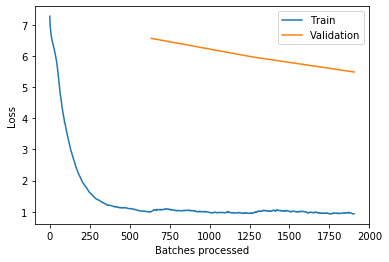

In [9]:
learn.recorder.plot_losses()

In [12]:
inputs, targets, outputs = get_predictions(learn)

In [ ]:
inputs[700], targets[700], outputs[700]

In [14]:
inputs[2513], targets[2513], outputs[2513]

(Text xxbos xxup xxx , coffee shop , xxmaj english , customer rating 3 out of 5 , family friendly yes , area riverside,
 Text xxbos xxmaj there is a friendly for kids coffee shop called xxup xxx that provides xxmaj english food in the riverside area . xxmaj the customer rating is 3 out of 5 .,
 Text xxbos xxup xxx is a kid friendly coffee shop that serves xxmaj english food . xxmaj it is located in the riverside area and has a customer rating of 3 out of 5 .)

In [15]:
inputs[4000], targets[4000], outputs[4000]

(Text xxbos xxmaj the xxup xxx , customer rating 3 out of 5 , area riverside,
 Text xxbos xxmaj the xxup xxx along the riverside is rated 3 out of 5 .,
 Text xxbos xxmaj the xxup xxx is a riverside restaurant with a customer rating of 3 out of 5 .)

In [16]:
learn.save('model_tf')

## Get predictions from dataframe

In [3]:
dl0 = E2ENLGDataLoader(dataset_path,"trainset.csv",None,percentile=100)
dl0.setDataAndMaxSize()

2019-11-17 16:42:55,237 - root - INFO - Size of input vocabulary=56
2019-11-17 16:42:55,243 - root - INFO - Size of output vocabulary=1232
2019-11-17 16:42:55,246 - root - INFO - Seq2SeqDataBunch;

Train: LabelList (42061 items)
x: Seq2SeqTextList
xxbos xxmaj the xxup xxx , pub , customer rating 5 out of 5 , price range more than £ 30 , near xxup yyy,xxbos xxmaj the xxup xxx , pub , xxmaj english , price range cheap , near xxup yyy,xxbos xxmaj the xxup xxx , coffee shop , xxmaj japanese , customer rating low , price range less than £ 20 , family friendly yes , area riverside , near xxup yyy,xxbos xxmaj the xxup xxx , coffee shop , xxmaj french , price range £ 20 - 25 , area riverside , near the xxup yyy,xxbos xxup xxx , xxmaj french , customer rating high , area riverside , near the xxup yyy
y: TextList
xxbos xxmaj the xxup xxx pub near xxup yyy has a 5 star rating . xxmaj prices start at £ 30 .,xxbos xxmaj close to xxup yyy , xxmaj the xxup xxx pub serves delicious xxmaj xxunk xxmaj x

In [4]:
dl.max_size

42

In [5]:
HIDDEN_LAYER_SIZE = 64
MAX_SIZE = dl.max_size
emb_enc = embs.emb_enc
emb_dec = embs.emb_dec
data = dl0.data
seq2seq_loss = Loss.seq2seq_loss
seq2seq_acc = Metrics.seq2seq_acc

rnn_tf = Seq2SeqRNN_tf(emb_enc, emb_dec, HIDDEN_LAYER_SIZE, MAX_SIZE)

learn = Learner(data, rnn_tf, loss_func=seq2seq_loss, metrics=[seq2seq_acc, CorpusBLEU(len(data.y.vocab.itos))],
               callback_fns=partial(TeacherForcing, end_epoch=10))

In [6]:
learn = learn.load('model_tf')
learn

Learner(data=Seq2SeqDataBunch;

Train: LabelList (42061 items)
x: Seq2SeqTextList
xxbos xxmaj the xxup xxx , pub , customer rating 5 out of 5 , price range more than £ 30 , near xxup yyy,xxbos xxmaj the xxup xxx , pub , xxmaj english , price range cheap , near xxup yyy,xxbos xxmaj the xxup xxx , coffee shop , xxmaj japanese , customer rating low , price range less than £ 20 , family friendly yes , area riverside , near xxup yyy,xxbos xxmaj the xxup xxx , coffee shop , xxmaj french , price range £ 20 - 25 , area riverside , near the xxup yyy,xxbos xxup xxx , xxmaj french , customer rating high , area riverside , near the xxup yyy
y: TextList
xxbos xxmaj the xxup xxx pub near xxup yyy has a 5 star rating . xxmaj prices start at £ 30 .,xxbos xxmaj close to xxup yyy , xxmaj the xxup xxx pub serves delicious xxmaj xxunk xxmaj xxunk for the cheap price of £ 10 . 50 . xxmaj delicious xxmaj pub food .,xxbos xxmaj the xxup xxx is a low rated coffee shop near xxup yyy and the riverside that is f

In [43]:
inputs, targets, outputs = get_predictions(learn,ds_type=DatasetType.Train)

In [44]:
inputs[0],targets[0],outputs[0]

(Text xxbos xxmaj the xxup xxx , coffee shop , xxmaj french , customer rating 5 out of 5 , price range more than £ 30 , family friendly no , area city centre , near xxup yyy,
 Text xxbos xxmaj the xxup xxx is a highly rated coffee shop in the xxmaj city xxmaj centre near xxup yyy . xxmaj it is aimed at older upper class people serving fantastic coffee and delicious xxmaj french xxmaj food .,
 Text xxbos xxmaj the xxup xxx is a coffee shop located in the city centre near xxup yyy . xxmaj it is not family - friendly and has a customer rating of 5 out of 5 . xxmaj it serves xxmaj french food)

In [45]:
rows = []
for i in range(len(inputs)):
    row = {"input":inputs[i],"output":outputs[i],"target":targets[i]}
    rows.append(row)
df = pd.DataFrame(rows)
df.to_csv("seq2seq_tf_dev.csv",index=False,sep="\t")